<a href="https://colab.research.google.com/github/Soulfex/Deep_Learning_Tarea2/blob/main/1_convolucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolución

Extiende la operación de convolución para imágenes en escala de grises (un solo canal) vista en clase (https://github.com/gibranfp/CursoAprendizajeProfundo/blob/2023-1/notebooks/2a_convolucion.ipynb) a imágenes a color (múltiples canales).

# Librerias

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
import cv2
from skimage import io
from sklearn.datasets import load_sample_image

## Carga conjunto de datos
Utilizaremos una imagen a color (RGB) para este ejercicio, la descargamos desde wiki

In [2]:
!wget https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png

--2022-11-12 22:57:46--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lenna_(test_image).png.1’

Lenna_(test_image). 100%[===================>] 462.73K  --.-KB/s    in 0.08s   

2022-11-12 22:57:47 (5.56 MB/s) - ‘Lenna_(test_image).png.1’ saved [473831/473831]



In [3]:
# Abrimos la imagen

imgBGR = cv2.imread('/content/Lenna_(test_image).png') # cv2 lee las imagenes en BGR
print(imgBGR.shape)
print(np.size(imgBGR,0))
# Voy a reducir la imagen para que se vea la influencia de la convolución



#Cambiamos de BGR  a RGB
imgRGB = np.zeros((np.size(imgBGR,0),np.size(imgBGR,1), np.size(imgBGR,2)))
print(imgRGB.shape)
for i in range(0,3):
  imgRGB[:,:,i] = imgBGR[:,:,2 - i]/255

normalImg = imgRGB
imgRGB = cv2.resize(imgRGB, (56,56))

(512, 512, 3)
512
(512, 512, 3)


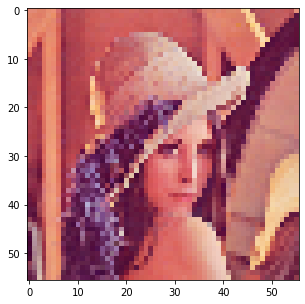

In [4]:
plt.figure(figsize=(8,5))
plt.imshow(imgRGB)

# Normalizamos el valor de la imagen

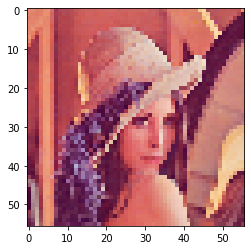

In [5]:
img = imgRGB / imgRGB.max()
plt.imshow(img)

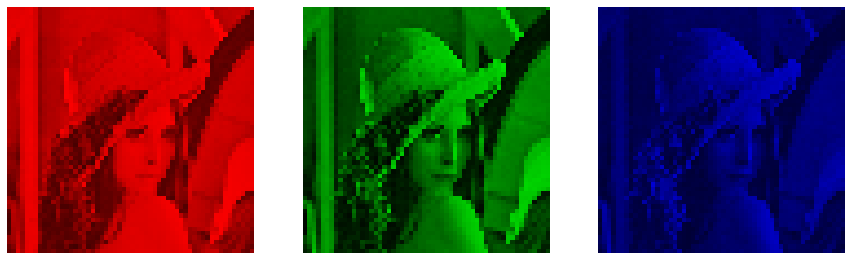

In [6]:
# Podemos ver los canales RGB
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5)) 

for c in (range(0,3)):  
    temp = np.zeros(img.shape) 
    temp[:,:,c] = img[:,:,c] 
    ax[c].imshow(temp)  
    ax[c].set_axis_off() 
plt.show()

## Convolución y correlación cruzada
Ahora consideremos las operación de convolución entre una imagen $I$ y un filtro $W$, la cual está definida por

$$
A_{i,j} = (\mathbf{I} * \mathbf{W})_{i,j} = \sum_m \sum_n I_{m, n} W_{i - m, j - n}
$$

La convolución es commutativa, por lo tanto 

$$
A_{i,j} = (\mathbf{W} * \mathbf{I})_{i,j} = \sum_m \sum_n I_{i - m, j - n} W_{m,n}
$$

En lugar de la convolución, frecuentemente se ocupa la operación de correlación cruzada para llevar a cabo las capas convolucionales. Esta operación es similar a la convolución pero sin voltear el filtro (por lo que pierde la propiedad de conmutatividad) y está dada por

$$
A_{i,j} = (\mathbf{W} * \mathbf{I})_{i,j} = \sum_m \sum_n I_{i + m, j + n} W_{m,n} 
$$

El resultado de estas operaciones es el mapa de activaciones $A(i,j)$. 

# Convolución multicanal

Para aplicar la convolución multicanal cargamos una imagen con tres canales y se aplica un filtro de tres canales obteniendo un solo mapa de características como se ejemplifica en la imagen.

<img src="https://www.researchgate.net/profile/Anton-Hristov/publication/335875913/figure/fig3/AS:906271578398722@1593083390618/A-convolution-on-a-RGB-image-The-three-2D-channels-result-in-a-2D-matrix.png" width="600"/>

## Definimos la función con la que se hace la convolución

In [7]:
def conv3D(I, W, stride = 1):
  heightConvImage = int(np.floor((I.shape[0] - W.shape[0]) / stride)) + 1
  widthConvImage = int(np.floor((I.shape[1] - W.shape[1]) / stride)) + 1

  convImage = np.zeros((heightConvImage, widthConvImage))
  for i in range(0,heightConvImage):
    for j in range(0,widthConvImage):
      I_m = I[i * stride:i * stride + W.shape[0], j * stride:j * stride + W.shape[1],:]
      convImage[i, j] = (I_m * W).sum()
  return convImage
    

## Filtro

Definamos un filtro de $3 \times 3 \times 3$ que detecte bordes en cierta orientación:

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


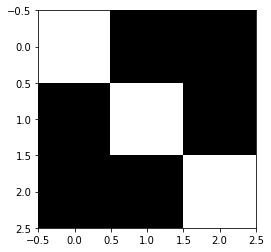

In [8]:
iden = np.identity(3)
print(iden)
filter1= np.zeros((3,3,3))
filter1[:,:,0] = iden
filter1[:,:,1] = iden
filter1[:,:,2] = iden

plt.imshow(filter1) 
plt.show()

Text(0.5, 1.0, 'Imagen convolucionada')

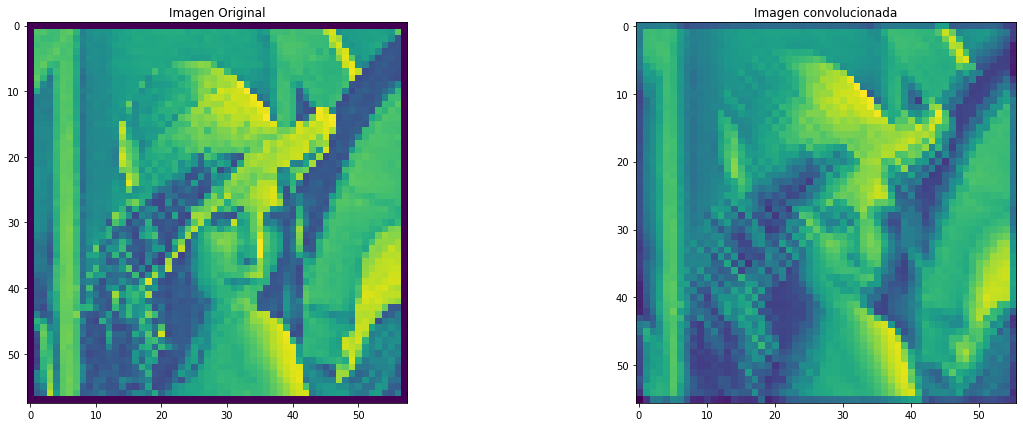

In [9]:
#Le agregamos un pading a la imagen

def addPadded(img):

  imgPadded = np.zeros((np.size(img,0) + 2, np.size(img,1)+2, 3))
  imgPadded[1:np.size(imgPadded,0)-1, 1:np.size(imgPadded,1)-1, :] = img

  return imgPadded


imgPadded = addPadded(img)

Image = np.zeros((np.size(imgPadded, 0), np.size(imgPadded,1)))

for i in range(0,np.size(imgPadded,0)):
  for j in range(0,np.size(imgPadded,1)):
    Image[i,j] = sum(imgPadded[i,j,:])/3
 




fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
axs[0].imshow(Image)
axs[0].set_title("Imagen Original")
#Se apliplica el primer filtro
outImage1 = conv3D(imgPadded,filter1,stride = 1)

axs[1].imshow(outImage1)
axs[1].set_title("Imagen convolucionada")

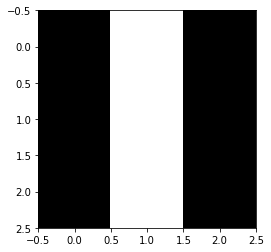

In [10]:
filter2 = np.zeros((3,3,3))
filter2[:, 1] = 1
plt.imshow(filter2, cmap = 'gray') 
plt.show()

(56, 56)


Text(0.5, 1.0, 'Imagen convolucionada')

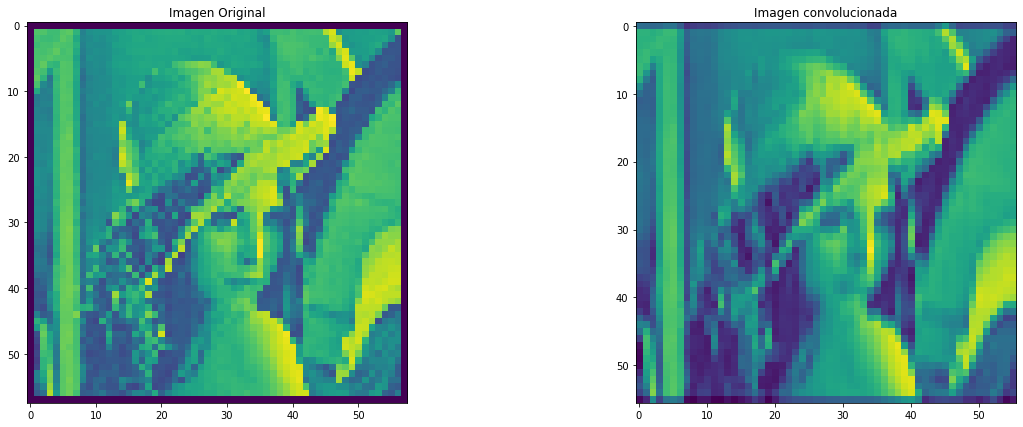

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
axs[0].imshow(Image)
axs[0].set_title("Imagen Original")
#Se apliplica el primer filtro
outImage2 = conv3D(imgPadded,filter2,stride = 1)
print(outImage2.shape)

axs[1].imshow(outImage2)
axs[1].set_title("Imagen convolucionada")

In [12]:
# A continuación definimos otro filtro 
filter3 = np.zeros((3,3,3))
filter3[:,:,0] = np.array([[0,0,0],[0,0,0],[0,0,0]])
filter3[:,:,1] = np.array([[-1,-2,-1],[-2,-4,-2],[-1,-2,-1]])
filter3[:,:,2] = np.array([[1,2,1],[2,4,2],[1,2,1]])



(56, 56)


Text(0.5, 1.0, 'Imagen convolucionada')

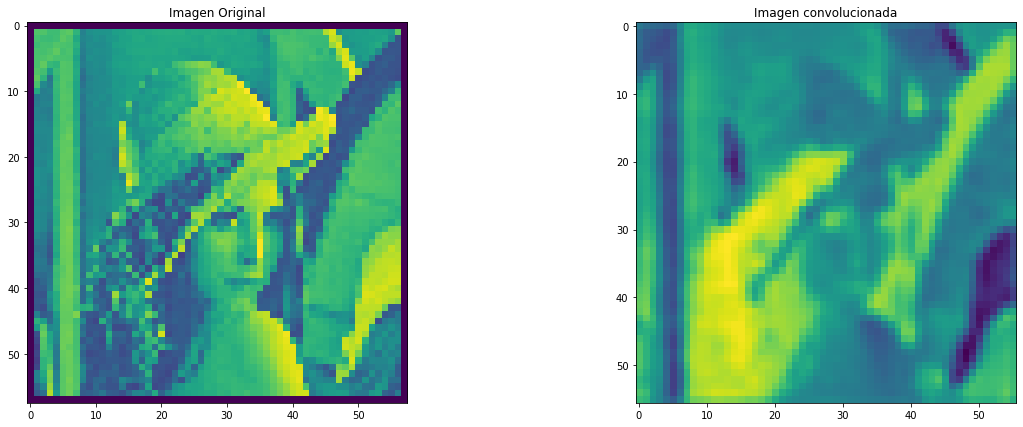

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
axs[0].imshow(Image)
axs[0].set_title("Imagen Original")
#Se apliplica el primer filtro
outImage3 = conv3D(imgPadded,filter3,stride = 1)
print(outImage3.shape)

axs[1].imshow(outImage3)
axs[1].set_title("Imagen convolucionada")

(56, 56)


Text(0.5, 1.0, 'Imagen convolucionada')

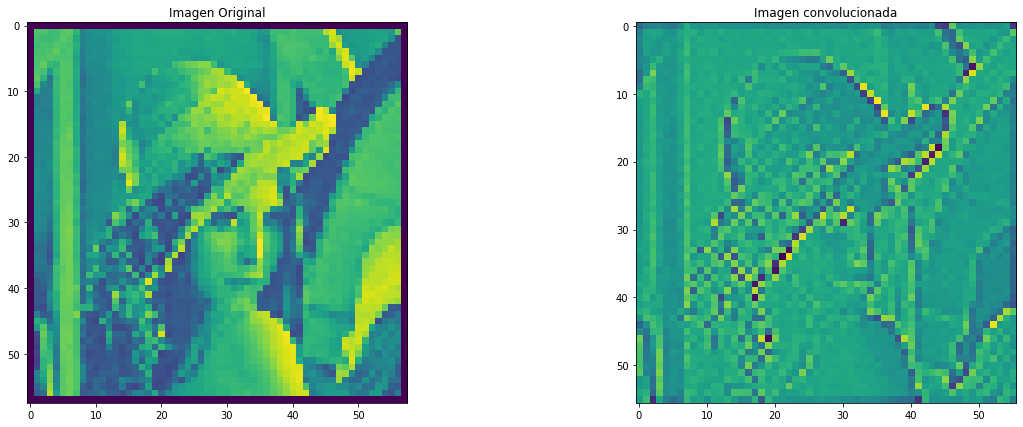

In [14]:
# Discrete Laplace operator
filter4 = np.zeros((3,3,3))
filter4[:,:,0] = np.array([[0,0,0],[0,1,0],[0,0,0]])
filter4[:,:,1] = np.array([[0,1, 0],[1,-6, 1],[0,1, 0]])
filter4[:,:,2] = np.array([[0,0,0],[0,1,0],[0,0,0]])

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
axs[0].imshow(Image)
axs[0].set_title("Imagen Original")
#Se apliplica el primer filtro
outImage4 = conv3D(imgPadded,filter4,stride = 1)
print(outImage4.shape)

axs[1].imshow(outImage4)
axs[1].set_title("Imagen convolucionada")

Text(0.5, 1.0, 'Imagen convolucionada, cmap = gray')

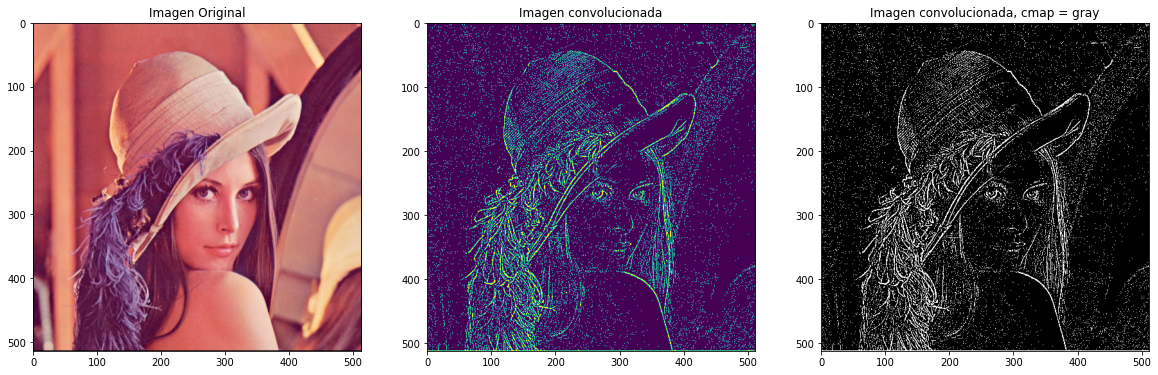

In [20]:
# imagen sin resize
image = addPadded(normalImg)
#filtro para detectar bordes
filterX = np.zeros((3,3,3))
filterX[:,:,0] = np.array([ [-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
filterX[:,:,1] = np.array([ [-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
filterX[:,:,2] = np.array([ [-1,-1,-1], [-1,8,-1], [-1,-1,-1]])

outImageX = conv3D(image, filterX, stride = 1)
outImageX = outImageX/np.max(outImageX)
threshold = 0.05



# Apliquemos un threshold
thresholdImage = np.zeros((np.size(outImageX,0), np.size(outImageX,1)))
for i in range(0,np.size(outImageX,0)):
  for j in range(0,np.size(outImageX,1)):
    if(outImageX[i,j] > threshold):
      thresholdImage[i,j] = 1
    else:
      thresholdImage[i,j] = 0

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
axs[0].imshow(image)
axs[0].set_title("Imagen Original")

axs[1].imshow(thresholdImage)
axs[1].set_title("Imagen convolucionada")

axs[2].imshow(thresholdImage, cmap = "gray")
axs[2].set_title("Imagen convolucionada, cmap = gray")



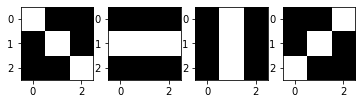

In [16]:
filters = np.zeros((4, 3, 3, 3))
filters[0, :, :, :] = filter1
filters[1, 1, :, :] = 1
filters[2, :, 1, :] = 1
filters[3, :, :, :] = filter1[::-1]

b = np.zeros(4)

plt.subplot(1,4,1)
plt.imshow(filters[0], cmap = 'gray') 
plt.subplot(1,4,2)
plt.imshow(filters[1], cmap = 'gray') 
plt.subplot(1,4,3)
plt.imshow(filters[2], cmap = 'gray') 
plt.subplot(1,4,4)
plt.imshow(filters[3], cmap = 'gray') 
plt.show()

In [17]:
def multi_conv2d(I, W):
  k = W.shape[0]
  activations = []
  for i in range(k):
    activations.append(conv3D(I, W[i])) 
                       
  return np.array(activations)

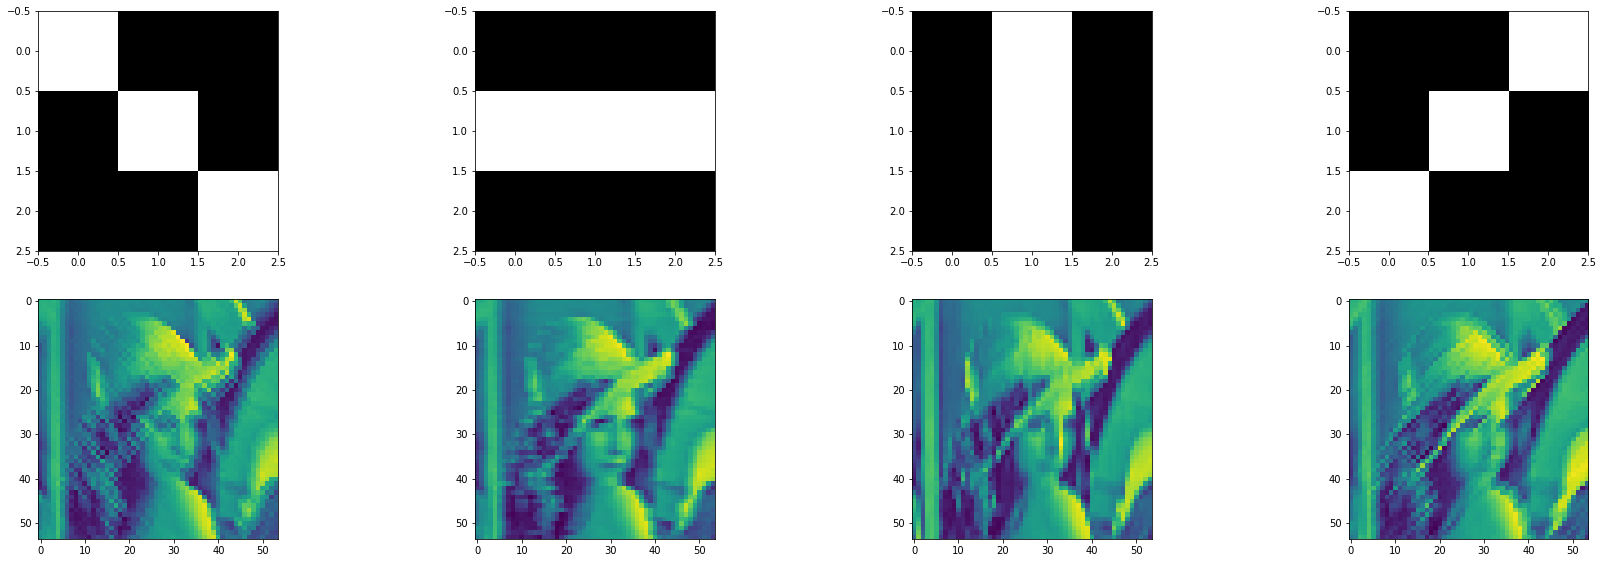

In [18]:
out_mul = multi_conv2d(img, filters)

plt.figure(figsize = (30, 15))
for i in range(4):
  plt.subplot(3,4,i + 1)
  plt.imshow(filters[i], cmap = 'gray')
  plt.subplot(3,4,i + 5)
  plt.imshow(out_mul[i])